## ANALISIS SENTIMEN KUALITAS PENDIDIKAN DI INDONESIA SELAMA PANDEMI COVID 19

## LOAD DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re

In [2]:
# Load dataset
def load_data():
    data = pd.read_csv("fix data dua label.csv")
    return data

In [3]:
data = load_data()
data

,tweet,label
0,@aLy_Bima 3T(Triliun) kenyang tuh ...\nalasan ...,1
1,Harap pihak sekolah tidak menyorokkan kes covi...,1
2,"Sebelum covid, pak anies malah ngijinin kelas ...",1
3,@MarhaenNews @Khairykj Entah lah what were the...,-1
4,Rasanya dah sampai masa cikgu cikgu pula yang ...,1
...,...,...
2125,@ndraaskszxr Sistem ulangannya gmn sih? Masih ...,-1
2126,Sekolah gue online lagi ampe semester depan so...,1
2127,"@convomf sebelum covid, aku bisa ngobrol sm te...",1
2128,Sudah berjalan satu setengah tahun lebih pande...,-1


## PREPROCESSING

### 1. Cek data kosong atau Missing Value

In [4]:
print('Jumlah NaN Value pada dataset: ',len(data[data.tweet.isna()==True]))

Jumlah NaN Value pada dataset:  0


### 2. Cleaning

In [5]:
import string 
import re

In [6]:
def remove_data(tweet):
    #hapus tab, new line dan ans black slice
    tweet = tweet.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    #hapus non ASCII (hapus emoticon, chinese word, dll)
    tweet = tweet.encode('ascii', 'replace').decode('ascii')
    #hapus mention, link, hastag
    tweet = ' '.join(re.sub("([@#][A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    #hapus incomplete URL
    return tweet.replace("http://", " ").replace("https://", " ")

data['tweet'] = data['tweet'].apply(remove_data)

#hapus nomor
def remove_number(tweet):
    return re.sub(r"\d+", "", tweet)

data['tweet'] = data['tweet'].apply(remove_number)

#hapus punctuation (tanda baca)
def remove_punctuation(tweet):
    return tweet.translate(str.maketrans("","",string.punctuation))

data['tweet'] = data['tweet'].apply(remove_punctuation)

#hapus whitespace
def remove_whitespace_LT(tweet):
    return tweet.strip()

data['tweet'] = data['tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(tweet):
    return re.sub('\s+',' ',tweet)

data['tweet'] = data['tweet'].apply(remove_whitespace_multiple)

#hapus single character
def remove_singl_char(tweet):
    return re.sub(r"\b[a-zA-Z]\b", "", tweet)

data['tweet'] = data['tweet'].apply(remove_singl_char)

data.head(10)

,tweet,label
0,Bima Triliun kenyang tuh alasan Covid kurikul...,1
1,Harap pihak sekolah tidak menyorokkan kes covid,1
2,Sebelum covid pak anies malah ngijinin kelas b...,1
3,Entah lah what were they thinking Apa tujuan b...,-1
4,Rasanya dah sampai masa cikgu cikgu pula yang ...,1
5,Selama masa pandemi sekolah anakku masih belum...,1
6,tahun online mantap bgt ga si stress banget as...,1
7,jujur yang sangat jujur aseli ini mah gua term...,1
8,new variant Covid its from south Africa ayo u...,1
9,beda lagi kak yang jaman sekolah apa lagi seme...,1


In [7]:
data.to_csv('datacleanIing-feb.csv', index=False)


### 2. Case Folding

In [8]:
#casefolding : mengubah text menjadi huruf kecil 
data['tweet']=data['tweet'].str.lower()
print('Hasil case folding \n')
print(data.head())

Hasil case folding 

                                               tweet  label
0  bima  triliun kenyang tuh alasan covid kurikul...      1
1    harap pihak sekolah tidak menyorokkan kes covid      1
2  sebelum covid pak anies malah ngijinin kelas b...      1
3  entah lah what were they thinking apa tujuan b...     -1
4  rasanya dah sampai masa cikgu cikgu pula yang ...      1


In [9]:
data.to_csv('datacasefol-feb.csv', index=False)

### 3. Filtering-Translasi Kata Non Baku

In [10]:
alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

data['tweet'] = data['tweet'].apply(normalize_alay) 
data.drop_duplicates(keep=False,inplace=True)

data.head(15)

,tweet,label
8,new variant covid ini from south africa ayo u...,1
10,gue gak tau home come parents can simply tak b...,-1
40,baca baca soal kasus amp semua yang ada kaitan...,-1
41,inyeop ini universitas kenapa sih mau menuruni...,-1
42,pendidikan memainkan peran penting dalam menin...,1
43,potret suram pendidikan di indonesia diiringi ...,1
44,benar kok dan gakbisa dipungkiri pendidikan ma...,1
46,ada sudut pandang yang ditilik oleh sih pembua...,1
47,dualisme pendidikan menghalangi itu tumpang ti...,1
48,kualitas mengajarnya luar biasa metode pengaja...,1


### 3. Tokenizing

In [11]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

def word_tokenize_wrapper(tweet):
    return word_tokenize(tweet)

data['tweet'] = data['tweet'].apply(word_tokenize_wrapper)
print('hasil tokenize')
data.head(10)

[nltk_data] Downloading package punkt to C:\Users\H
[nltk_data]     P\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


hasil tokenize


,tweet,label
8,"[new, variant, covid, ini, from, south, africa...",1
10,"[gue, gak, tau, home, come, parents, can, simp...",-1
40,"[baca, baca, soal, kasus, amp, semua, yang, ad...",-1
41,"[inyeop, ini, universitas, kenapa, sih, mau, m...",-1
42,"[pendidikan, memainkan, peran, penting, dalam,...",1
43,"[potret, suram, pendidikan, di, indonesia, dii...",1
44,"[benar, kok, dan, gakbisa, dipungkiri, pendidi...",1
46,"[ada, sudut, pandang, yang, ditilik, oleh, sih...",1
47,"[dualisme, pendidikan, menghalangi, itu, tumpa...",1
48,"[kualitas, mengajarnya, luar, biasa, metode, p...",1


In [12]:
data.to_csv('datatoken-feb.csv', index=False)

### 4. Filtering-Stopword Removal

In [13]:
import nltk
from nltk.corpus import stopwords

def stopward_removal(tweet):
    filtering =  stopwords.words('indonesian')
    more_stopwords = ['yg', 'dg', 'rt', 'dgn', 'ny', 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'hahaha', 'aaa','kek','pd','gue']
    x = []
    data = []
    def myFunc(x):
        if x in filtering+more_stopwords:
            return False
        else:
            return True
    fit = filter(myFunc, tweet)
    for x in fit:
        data.append(x)
    return data

data['tweet'] = data['tweet'].apply(stopward_removal)
data.head()

,tweet,label
8,"[new, variant, covid, from, south, africa, ayo...",1
10,"[home, come, parents, can, simply, anak, pergi...",-1
40,"[baca, baca, kaitannya, novia, sedih, campur, ...",-1
41,"[inyeop, universitas, menuruni, kualitas, kamp...",-1
42,"[pendidikan, memainkan, peran, meningkatkan, k...",1


In [14]:
data.to_csv('datafilter-feb.csv', index=False)

### 5. Stemming

In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmer_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['tweet']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("-----------------------")

for term in term_dict:
    term_dict[term] = stemmer_wrapper(term)
    print(term, ":" , term_dict[term])
    
print(term_dict)
print("-----------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['tweet'] = data['tweet'].apply(get_stemmed_term)
print(data.head())

6128
-----------------------
new : new
variant : variant
covid : covid
from : from
south : south
africa : africa
ayo : ayo
universitas : universitas
sekolah : sekolah
online : online
home : home
come : come
parents : parents
can : can
simply : simply
anak : anak
pergi : pergi
ok : ok
if : if
hantar : hantar
takut : takut
but : but
some : some
teachers : teachers
made : made
initiative : initiative
class : class
kot : kot
for : for
grup : grup
duduk : duduk
rumah : rumah
even : even
the : the
jemput : jemput
to : to
join : join
in : in
baca : baca
kaitannya : kait
novia : novia
sedih : sedih
campur : campur
emosi : emosi
valid : valid
bicara : bicara
umur : umur
pendidikan : didik
tolak : tolak
ukur : ukur
kualitas : kualitas
personal : personal
branding : branding
kadang : kadang
menipu : tipu
inyeop : inyeop
menuruni : turun
kampus : kampus
instasi : instasi
mendidik : didik
ber : ber
ilmu : ilmu
tenaga : tenaga
krnapa : krnapa
seakan : akan
meremehkan : remeh
reputasi : reputasi
mena

In [16]:
data.to_csv('dua label bersih.csv', index=False)

In [17]:
data_bersih = pd.read_csv('dua label bersih.csv', sep=',',encoding='latin1')

In [18]:
data_bersih.head()

,tweet,label
0,"['new', 'variant', 'covid', 'from', 'south', '...",1
1,"['home', 'come', 'parents', 'can', 'simply', '...",-1
2,"['baca', 'baca', 'kait', 'novia', 'sedih', 'ca...",-1
3,"['inyeop', 'universitas', 'turun', 'kualitas',...",-1
4,"['didik', 'main', 'peran', 'tingkat', 'kualita...",1


In [19]:
#Menghitung kembali jumlah sentimen
data_bersih["label"].value_counts()

 1    1399
-1     295
Name: label, dtype: int64

C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


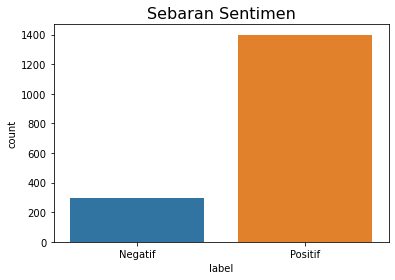

In [20]:
#Membuat barchart untuk jumlah sentimen
sns.countplot(data_bersih["label"])
plt.title("Sebaran Sentimen", fontsize=16)
plt.xticks([0, 1], ["Negatif","Positif"])
plt.show()

(-0.5, 399.5, 199.5, -0.5)

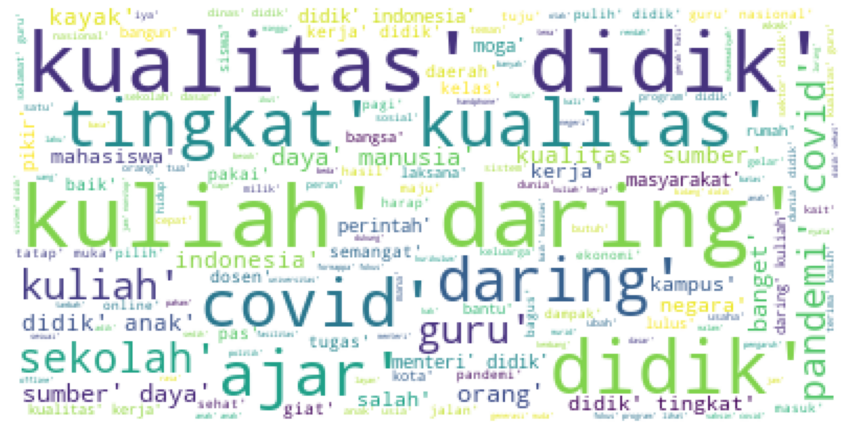

In [21]:
#Membuat wordcloud untuk kata yang sering muncul
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 10
str_tweets = ' '.join(data_bersih['tweet'].values)
wordcloud = WordCloud(background_color='white', max_words=1000).generate(str_tweets)
plt.imshow(wordcloud)
plt.axis('off')

## EKSTRAKSI FITUR TF-IDF

In [22]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

data_bersih["tweet_list"] = data_bersih["tweet"].apply(convert_text_list)


print(data_bersih["tweet_list"][90])

print("\ntype : ", type(data_bersih["tweet_list"][90]))

['id', 'tuju', 'pengaruh', 'kualitas', 'didik', 'formal', 'masuk', 'didik', 'karakter', 'kurikulum', 'kompetensi', 'dasar', 'mana', 'sepele', 'taat', 'atur', 'masuk', 'kompetensi', 'dasar', 'sekolah', 'bginian', 'paham']

type :  <class 'list'>


In [23]:
import pandas as pd

# Membaca file CSV
data = pd.read_csv("datastem1.csv")
# Memilih kolom "tweet"
tweets = data["tweet"]

# Menghitung frekuensi kemunculan setiap kata dalam dokumen
word_counts = {}
for tweet in tweets:
    for word in tweet.split():
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1

# Menghitung skor TF untuk setiap kata dalam dokumen
tf_scores = {}
for word in word_counts:
    tf_scores[word] = word_counts[word] / len(tweets)

# Menyimpan hasil ke dalam file teks
with open("nama_file_tf.txt", "w") as f:
    for word, score in tf_scores.items():
        f.write("{}\t{}\n".format(word, score))

In [24]:
def count_words(document):
    # Split the document into individual words
    words = document.split()
    # Count the number of words
    num_words = len(words)
    # Count the number of occurrences of each word
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return num_words, word_counts


In [25]:
import os

current_dir = os.getcwd()
print(current_dir)


C:\Users\H P


In [26]:
# Import the necessary libraries
import os

# Define the function to count the number of words and word occurrences in a document
def count_words(document):
    # Split the document into individual words
    words = document.split()
    # Count the number of words
    num_words = len(words)
    # Count the number of occurrences of each word
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return num_words, word_counts

# Define the function to calculate term frequency
def calc_TF(document):
    # Call the count_words function to count the number of words and word occurrences
    num_words, word_counts = count_words(document)
    # Calculate the term frequency for each word
    TF_dict = {}
    for term in word_counts:
        TF_dict[term] = word_counts[term] / num_words
    return TF_dict

# Set the path to the directory containing the documents
doc_dir = "C:/Users/H P"


# Read each document in the directory
for filename in os.listdir(doc_dir):
    # Check if the file is a text file
    if filename.endswith(".txt"):
        # Read the contents of the file
        with open(os.path.join(doc_dir, filename), "r") as f:
            document = f.read()
        # Calculate the term frequency for each word in the document
        TF_dict = calc_TF(document)
        # Print the results
        print("Term frequency dari setiap kata dalam dokumen", filename, ":", TF_dict)


Term frequency dari setiap kata dalam dokumen daftarlulus.txt : {'PUTRI': 0.027777777777777776, 'LAILATUL': 0.004629629629629629, 'KHOIRIYAH': 0.004629629629629629, 'GALUH': 0.004629629629629629, 'INDRIATI': 0.004629629629629629, 'MEYTA': 0.004629629629629629, 'WULANSARI': 0.004629629629629629, 'ANANDIKA': 0.004629629629629629, 'MARSA': 0.004629629629629629, 'JORDAN': 0.004629629629629629, 'DWI': 0.004629629629629629, 'FATMAWANTI': 0.004629629629629629, 'FENINDA': 0.004629629629629629, 'RAHMADIAH': 0.004629629629629629, 'LUTHFIA': 0.004629629629629629, 'WIRAPUTRI': 0.004629629629629629, 'HUSNA': 0.004629629629629629, 'NUR': 0.027777777777777776, 'SAGITA': 0.004629629629629629, 'RISKA': 0.004629629629629629, 'OKTAVIANA': 0.004629629629629629, 'IQBAL': 0.004629629629629629, 'KAMALUDDIN': 0.004629629629629629, 'LUTHFIANA': 0.004629629629629629, 'SALMA': 0.004629629629629629, 'AZZAHRO': 0.004629629629629629, 'DINDA': 0.009259259259259259, 'MUSHTHAFA': 0.004629629629629629, 'HANIFA': 0.0046

In [27]:
import pandas as pd
import numpy as np
import ast

# function to calculate TF
def calc_TF(document):
    # Counts the number of times the word appears in document
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

# calculate TF for each document
data_bersih['tf_dict']= data_bersih['tweet_list'].apply(calc_TF)

def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

# function to calculate IDF
def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term]+1)) # add 1 to avoid division by zero
    return IDF_Dict

# calculate IDF for all terms
DF = calc_DF(data_bersih["tf_dict"])
n_document = len(data_bersih)
IDF = calc_IDF(n_document, DF)

# function to calculate TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the document, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

# calculate TF-IDF for each document
data_bersih["TFIDF_dict"] = data_bersih["tf_dict"].apply(calc_TF_IDF)

# print TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data_bersih["TFIDF_dict"][index]:
    print('%20s' % key, "\t", data_bersih["tf_dict"][index][key] ,"\t" , data_bersih["TFIDF_dict"][index][key])


                term 	         TF 	              TF-IDF

                  id 	 0.045454545454545456 	 0.20656709624162886
                tuju 	 0.045454545454545456 	 0.17765851593617446
            pengaruh 	 0.045454545454545456 	 0.18334774970681111
            kualitas 	 0.045454545454545456 	 0.04182432656088499
               didik 	 0.09090909090909091 	 0.04050114629431271
              formal 	 0.045454545454545456 	 0.25650401845381565
               masuk 	 0.09090909090909091 	 0.35803093761322907
            karakter 	 0.045454545454545456 	 0.22499732842836362
           kurikulum 	 0.045454545454545456 	 0.20916520596162652
          kompetensi 	 0.09090909090909091 	 0.5130080369076313
               dasar 	 0.09090909090909091 	 0.30995419858880463
                mana 	 0.045454545454545456 	 0.18648378931985438
              sepele 	 0.045454545454545456 	 0.28801070847926774
                taat 	 0.045454545454545456 	 0.3064409406660025
                atur 	 0.

In [28]:
def count_words(document):
    # Split the document into individual words
    words = document.split()
    # Count the number of words
    num_words = len(words)
    # Count the number of occurrences of each word
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

In [29]:
index = 90
print("TF values for index", index)
for term, value in data_bersih["tf_dict"][index].items():
    print(f"{term}: {value}")


TF values for index 90
id: 0.045454545454545456
tuju: 0.045454545454545456
pengaruh: 0.045454545454545456
kualitas: 0.045454545454545456
didik: 0.09090909090909091
formal: 0.045454545454545456
masuk: 0.09090909090909091
karakter: 0.045454545454545456
kurikulum: 0.045454545454545456
kompetensi: 0.09090909090909091
dasar: 0.09090909090909091
mana: 0.045454545454545456
sepele: 0.045454545454545456
taat: 0.045454545454545456
atur: 0.045454545454545456
sekolah: 0.045454545454545456
bginian: 0.045454545454545456
paham: 0.045454545454545456


In [30]:
DF

{'new': 4,
 'variant': 3,
 'covid': 472,
 'from': 4,
 'south': 1,
 'africa': 1,
 'ayo': 10,
 'universitas': 36,
 'sekolah': 192,
 'online': 61,
 'home': 3,
 'come': 1,
 'parents': 1,
 'can': 3,
 'simply': 1,
 'anak': 142,
 'pergi': 8,
 'ok': 2,
 'if': 4,
 'hantar': 1,
 'takut': 14,
 'but': 5,
 'some': 1,
 'teachers': 1,
 'made': 1,
 'initiative': 1,
 'class': 2,
 'kot': 1,
 'for': 9,
 'grup': 7,
 'duduk': 11,
 'rumah': 55,
 'even': 4,
 'the': 22,
 'jemput': 2,
 'to': 13,
 'join': 5,
 'in': 11,
 'baca': 18,
 'kait': 29,
 'novia': 1,
 'sedih': 19,
 'campur': 1,
 'emosi': 4,
 'valid': 1,
 'bicara': 14,
 'umur': 5,
 'didik': 1084,
 'tolak': 6,
 'ukur': 8,
 'kualitas': 674,
 'personal': 1,
 'branding': 2,
 'kadang': 8,
 'tipu': 4,
 'inyeop': 1,
 'turun': 34,
 'kampus': 54,
 'instasi': 1,
 'ber': 3,
 'ilmu': 22,
 'tenaga': 28,
 'krnapa': 1,
 'akan': 2,
 'remeh': 2,
 'reputasi': 1,
 'tambah': 22,
 'jelek': 6,
 'main': 11,
 'peran': 31,
 'tingkat': 279,
 'hidup': 53,
 'sandang': 5,
 'disabilit

In [31]:
IDF

{'new': 5.8254099627779,
 'variant': 6.048553514092109,
 'covid': 1.2757524867200667,
 'from': 5.8254099627779,
 'south': 6.741700694652055,
 'africa': 6.741700694652055,
 'ayo': 5.0369526024136295,
 'universitas': 3.8239299625677754,
 'sekolah': 2.172157686307114,
 'online': 3.307713490166908,
 'home': 6.048553514092109,
 'come': 6.741700694652055,
 'parents': 6.741700694652055,
 'can': 6.048553514092109,
 'simply': 6.741700694652055,
 'anak': 2.4720032449520923,
 'pergi': 5.23762329787578,
 'ok': 6.33623558654389,
 'if': 5.8254099627779,
 'hantar': 6.741700694652055,
 'takut': 4.72679767410979,
 'but': 5.643088405983945,
 'some': 6.741700694652055,
 'teachers': 6.741700694652055,
 'made': 6.741700694652055,
 'initiative': 6.741700694652055,
 'class': 6.33623558654389,
 'kot': 6.741700694652055,
 'for': 5.132262782217954,
 'grup': 5.355406333532164,
 'duduk': 4.949941225423999,
 'rumah': 3.4094961844768505,
 'even': 5.8254099627779,
 'the': 4.2993536592828505,
 'jemput': 6.33623558654

In [32]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector
# Create a matrix of TF-IDF vectors for all tweets
data_bersih["TF_IDF_Vec"] = data_bersih["TFIDF_dict"].apply(calc_TF_IDF_Vec)

TF_IDF_matrix = np.stack(data_bersih['TF_IDF_Vec'].values)

# Print matrix size
print('TF-IDF matrix shape:', TF_IDF_matrix.shape)

TF-IDF matrix shape: (1694, 50)


In [33]:
X = TF_IDF_matrix
print(X)
X.shape

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.0247507  0.05111862 0.         ... 0.         0.         0.        ]
 ...
 [0.0178205  0.         0.         ... 0.         0.         0.14091299]
 [0.03182233 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


(1694, 50)

### DATA SPLITTING 
## 70:30

In [34]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, data_bersih['label'], test_size=0.3, random_state=42)
print("Data Training Set:")
for data, label in zip(X_train, y_train):
    print(f"Data: {data}, Label: {label}")

# Menampilkan kalimat data testing set
print("Data Testing Set:")
for data, label in zip(X_test, y_test):
    print(f"Data: {data}, Label: {label}")

Data Training Set:
Data: [0.         0.         0.14245032 0.07308359 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ], Label: 1
Data: [0.0495014  0.10223724 0.         0.         0.         0.
 0.         0.24135085 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.   

In [35]:
X_train

array([[0.        , 0.        , 0.14245032, ..., 0.        , 0.        ,
        0.        ],
       [0.0495014 , 0.10223724, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.21367549, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06677359, ..., 0.        , 0.        ,
        0.        ],
       [0.01350038, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.21367549, ..., 0.        , 0.        ,
        0.        ]])

In [36]:
print("Data Testing Set:")
for data, label in zip(X_test, y_test):
    print(f"Data: {data}, Label: {label}")


Data Testing Set:
Data: [0.0178205  0.         0.         0.         0.0510301  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.10690696 0.         0.
 0.         0.         0.12161595 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.13497619 0.13567186
 0.         0.         0.         0.         0.         0.
 0.         0.13710059 0.         0.         0.         0.
 0.         0.        ], Label: 1
Data: [0.03712605 0.         0.         0.         0.10631271 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.27430943
 0.         0.27699783 0.         0.         0.         0.
 0.28264972 0.         0.         0.         0.         0.
 0.         0.         0.         0

## Naive Bayes
### Model Klasifikasi Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

model_nb=MultinomialNB().fit(X_train, y_train)
predict_nb = model_nb.predict(X_test)

In [38]:
from sklearn.naive_bayes import MultinomialNB

model_nb=MultinomialNB().fit(X_train, y_train)

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


model_nb=MultinomialNB().fit(X_train, y_train)
predict_nb = model_nb.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

# Cetak laporan klasifikasi
print("Laporan Klasifikasi Naive Bayes:")
print(classification_report(y_test, predict_nb))


Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        82
           1       0.84      1.00      0.91       427

    accuracy                           0.84       509
   macro avg       0.42      0.50      0.46       509
weighted avg       0.70      0.84      0.77       509



C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Pengujian Klasifikasi Naive Bayes

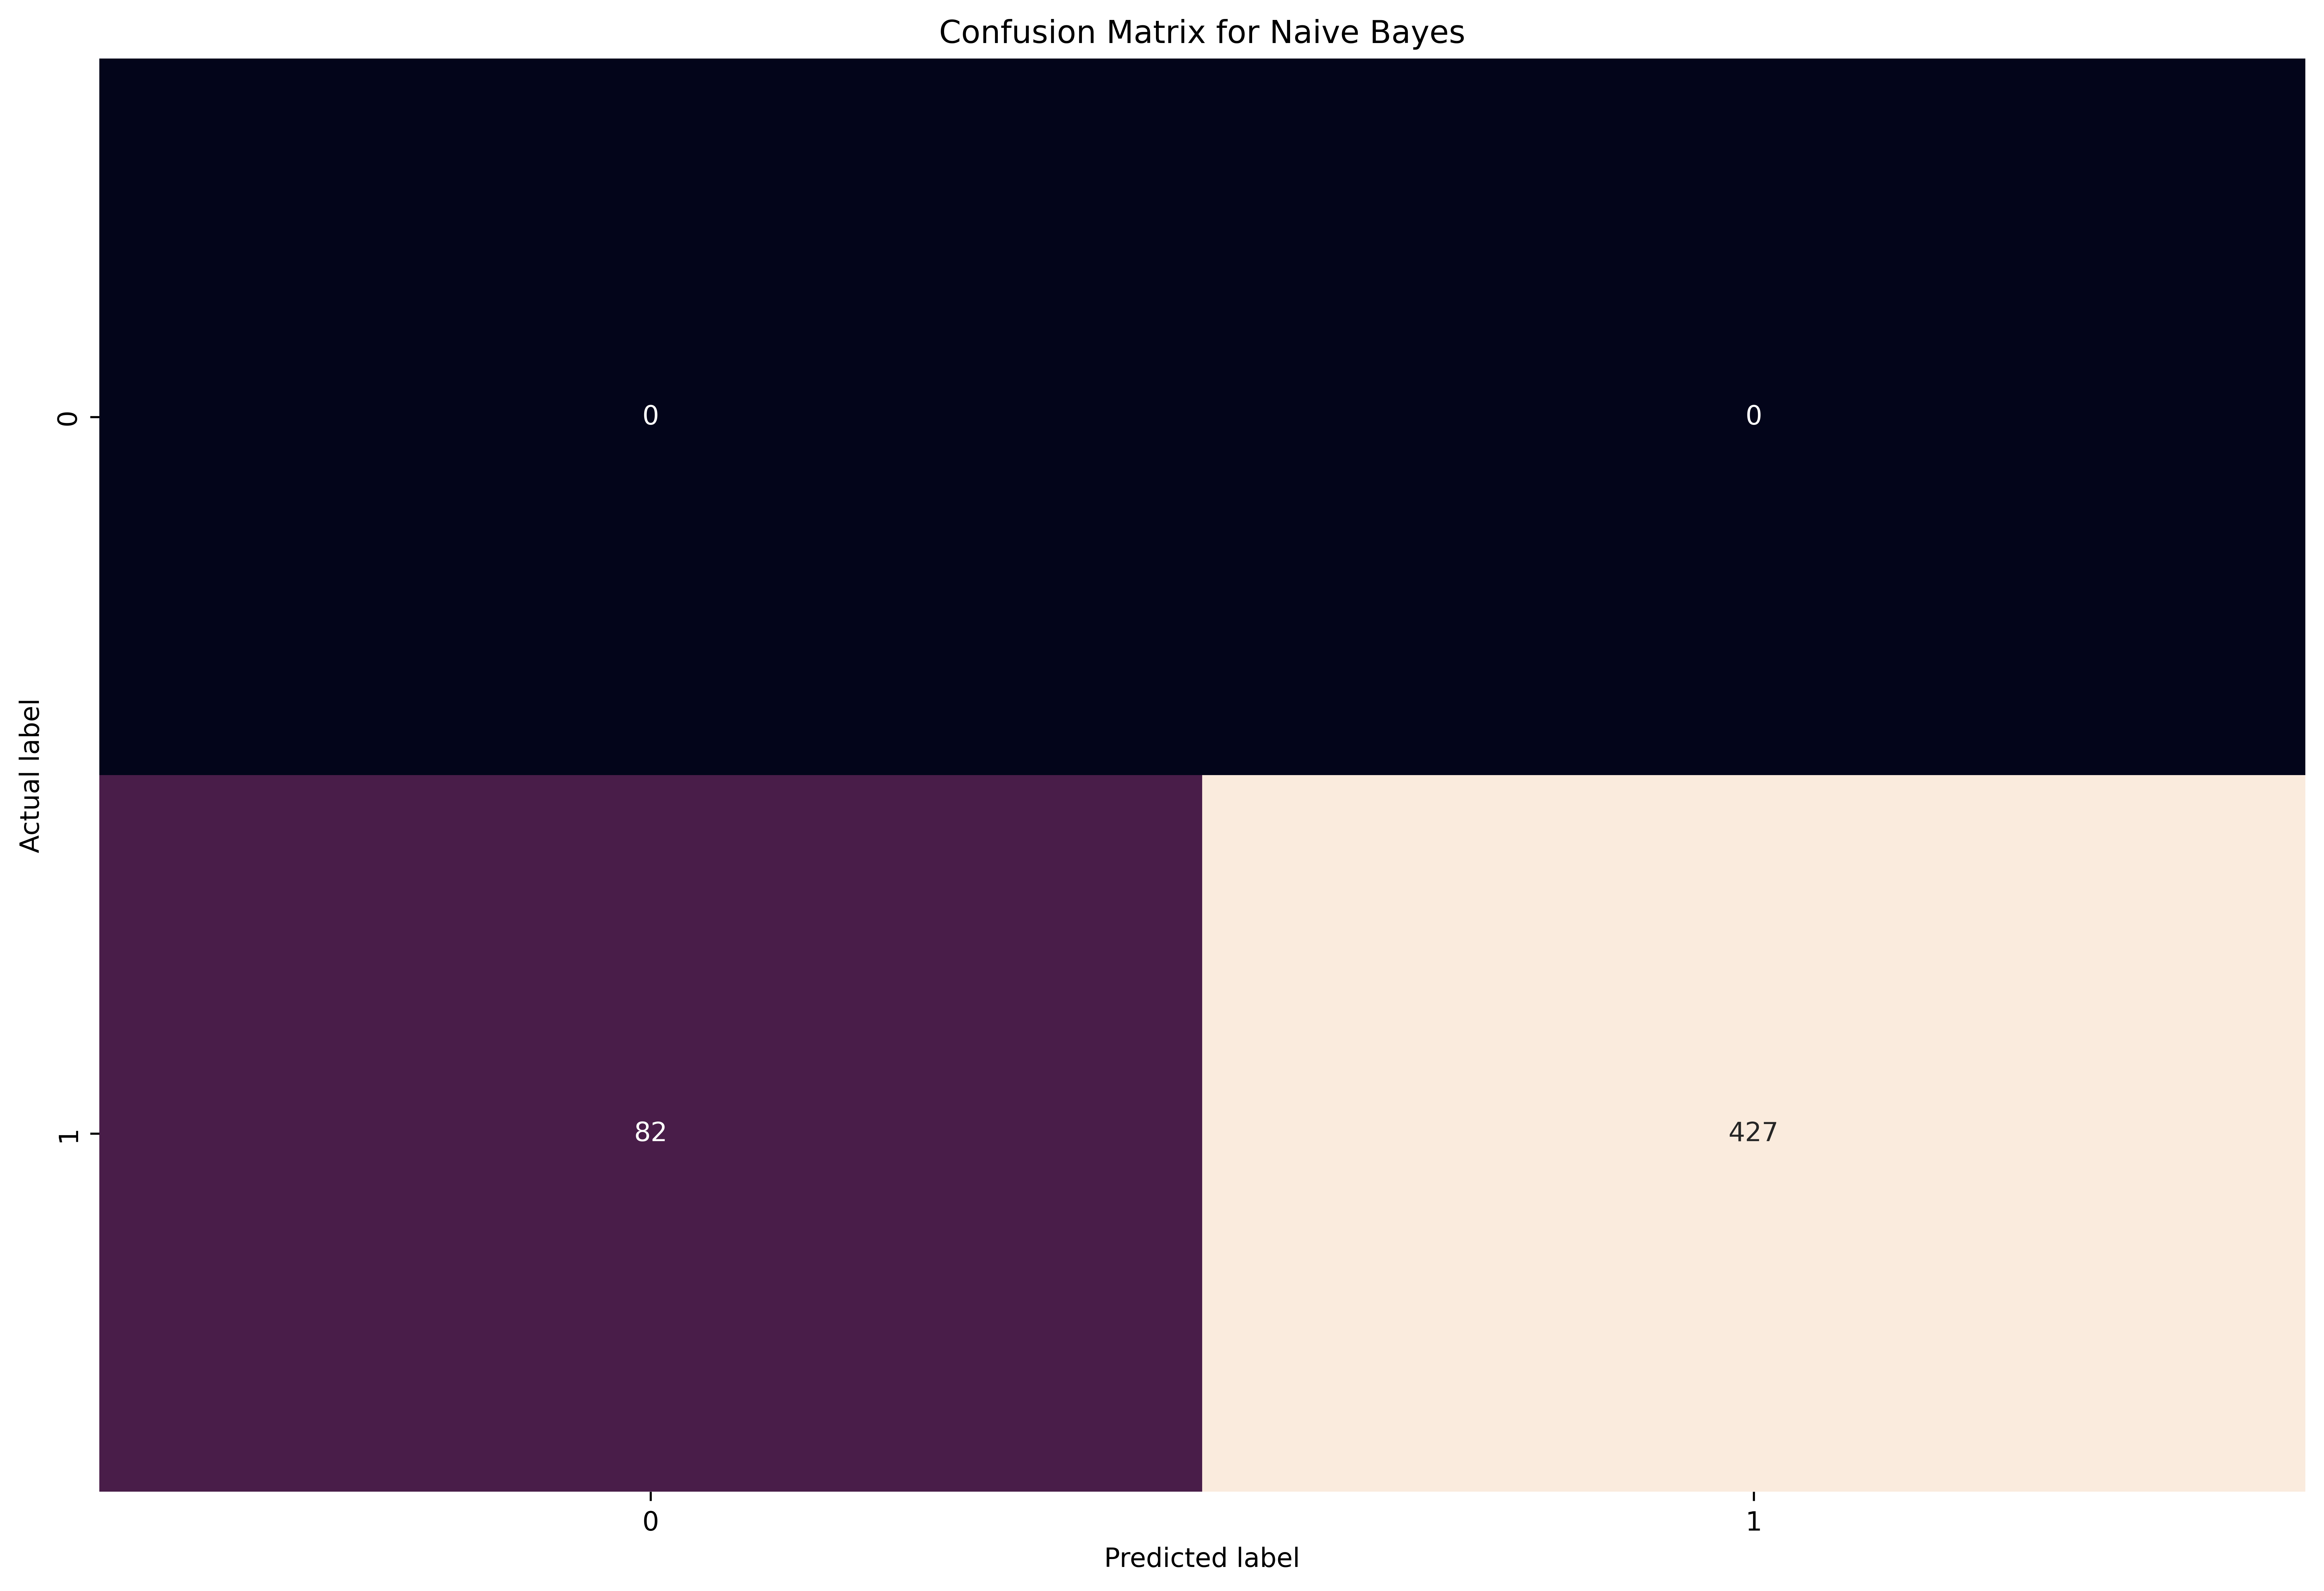

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predict_nb)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

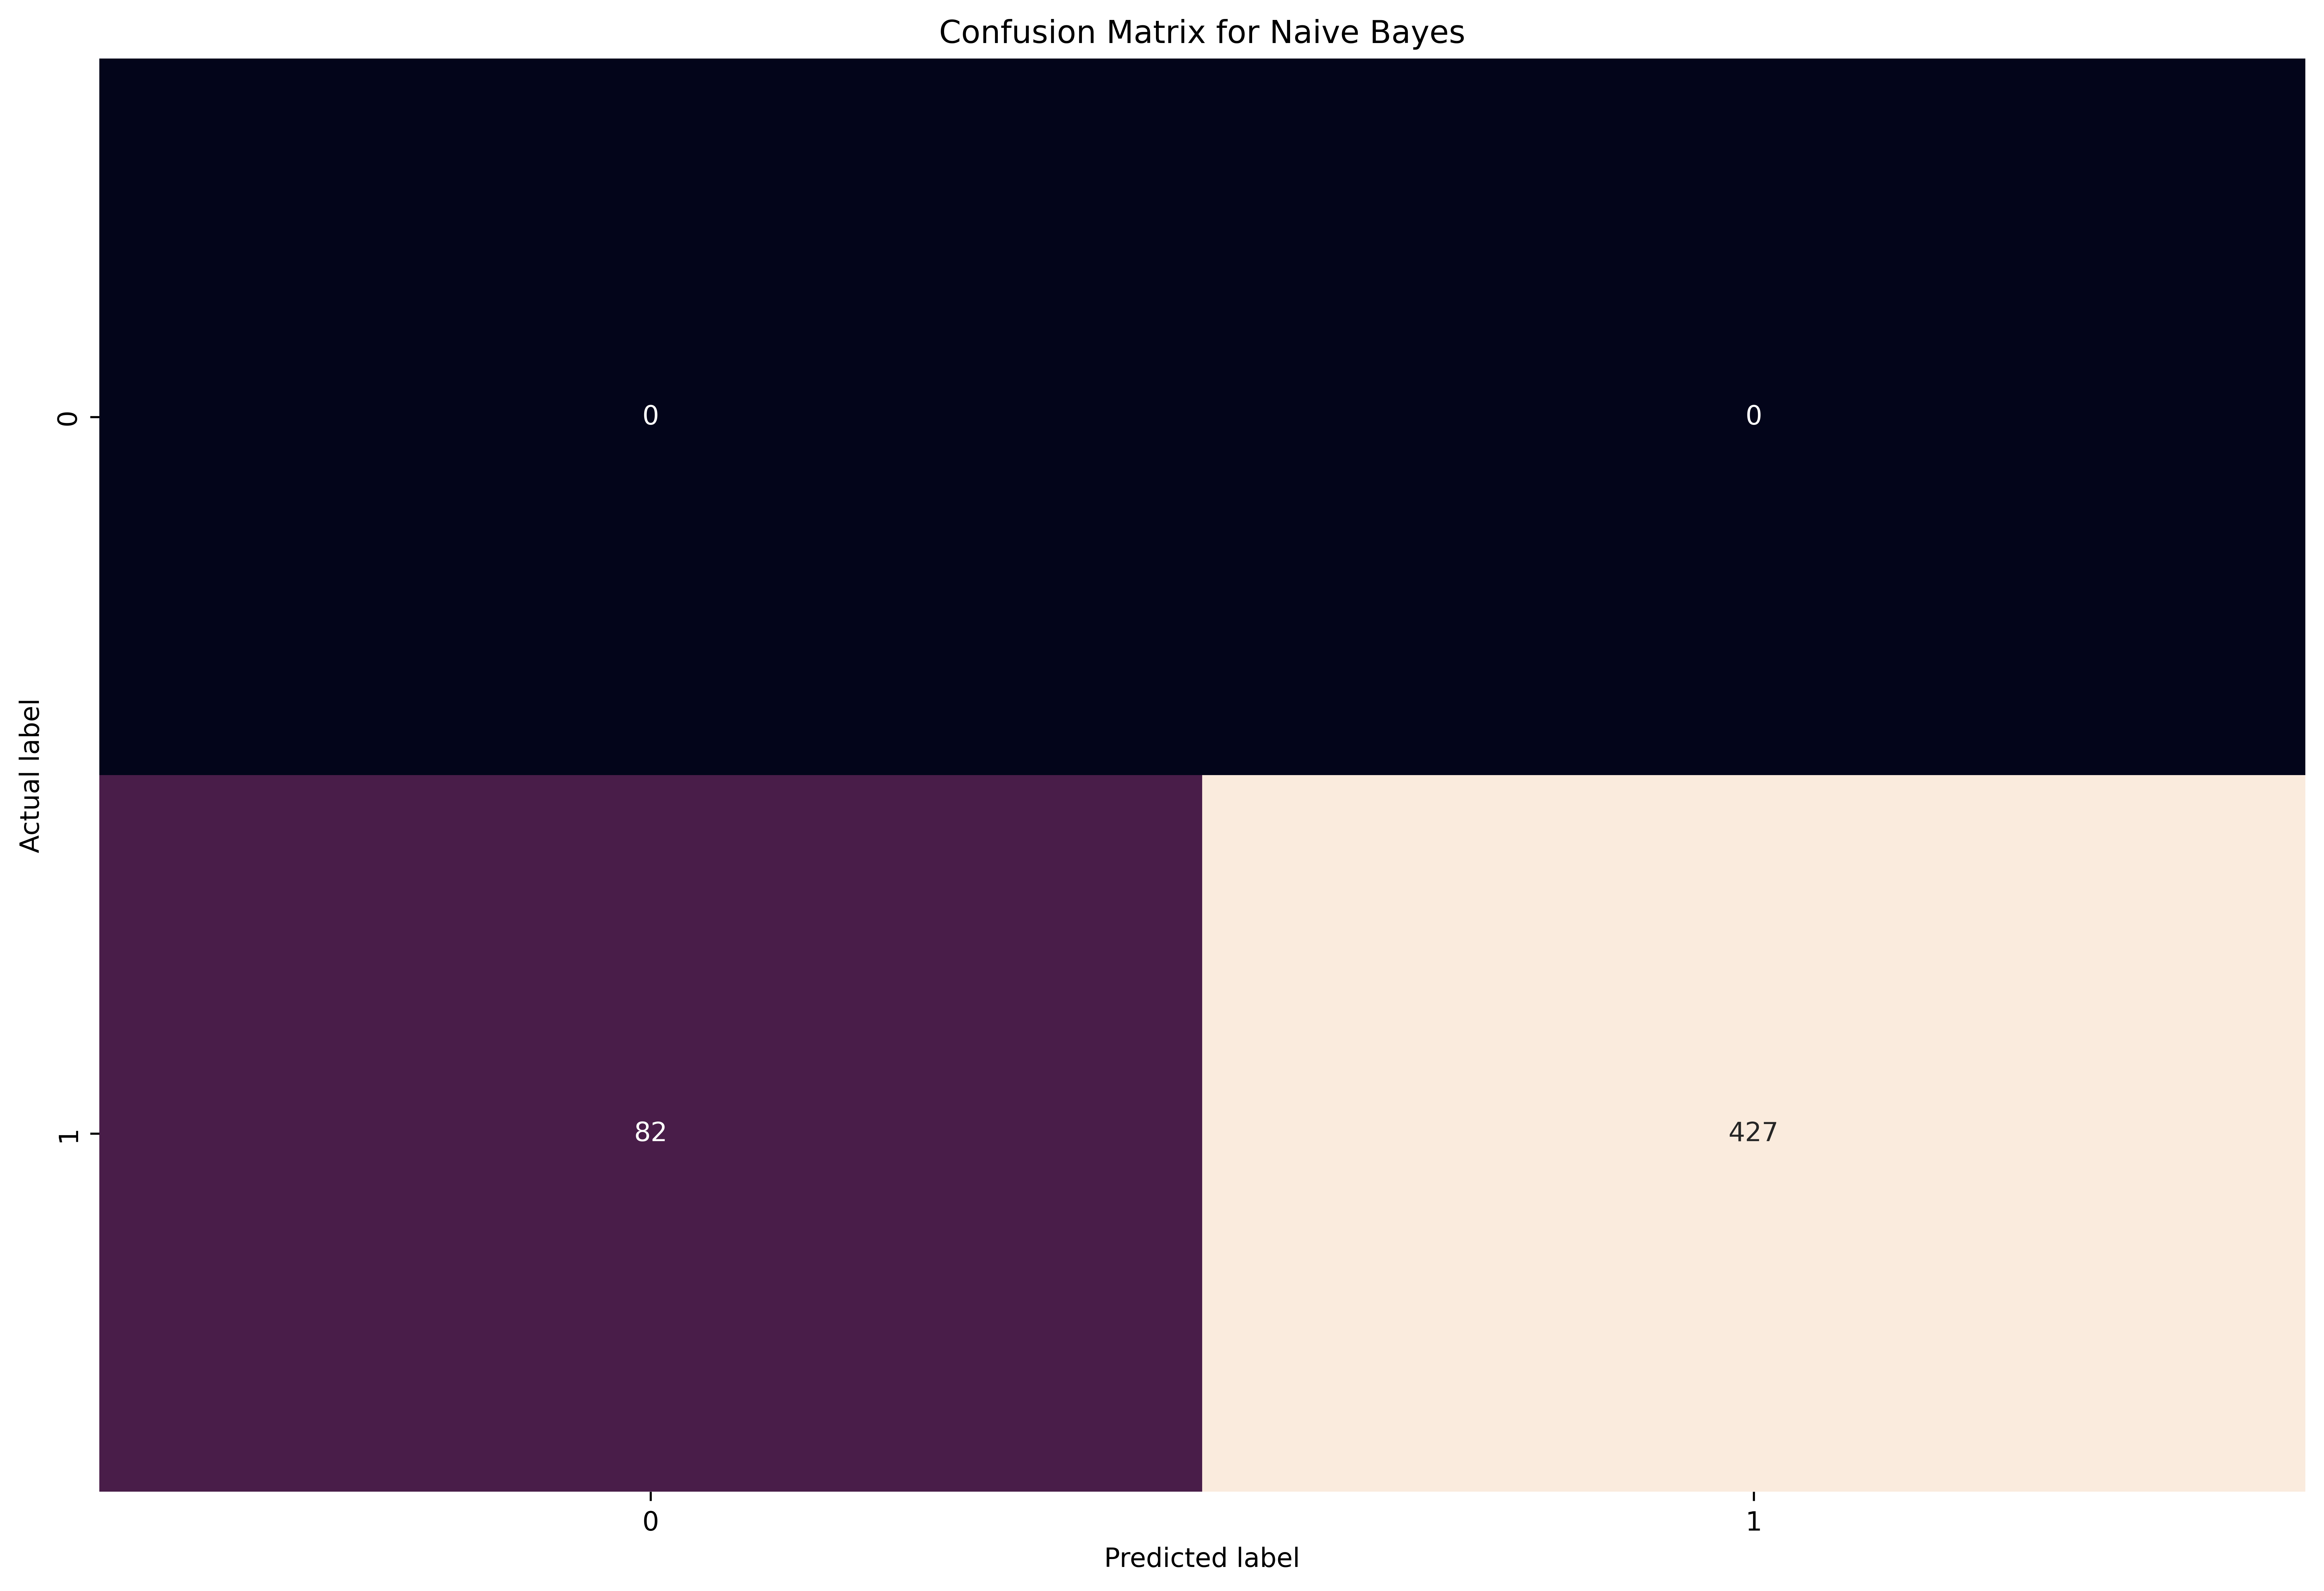

In [42]:
predict_nb = model_nb.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predict_nb)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

## Evaluasi Performa Klasifikasi Naive Bayes
### Accuracy, Precision, Recall dan F Measure

In [43]:
from sklearn.metrics import accuracy_score
score_nb = accuracy_score(predict_nb, y_test)
print("Naive Bayes Accuracy:", score_nb)
print("Naive Bayes Precision:", precision_score(y_test,predict_nb, average="micro", pos_label='negative'))
print("Naive Bayes Recall:", recall_score(y_test,predict_nb, average="micro", pos_label='positive'))
print("Naive Bayes F Measure:", f1_score(y_test,predict_nb, average="micro", pos_label='negative'))
print('\n===============================================================')
print(classification_report(y_test, predict_nb, zero_division=0))

Naive Bayes Accuracy: 0.8388998035363457
Naive Bayes Precision: 0.8388998035363457
Naive Bayes Recall: 0.8388998035363457
Naive Bayes F Measure: 0.8388998035363457

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        82
           1       0.84      1.00      0.91       427

    accuracy                           0.84       509
   macro avg       0.42      0.50      0.46       509
weighted avg       0.70      0.84      0.77       509



C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'negative') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'negative') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# SVM
## Model klasifikasi SVM

In [44]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)
predict_svm = model_svm.predict(X_test)

In [45]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Pengujian Klasifikasi SVM

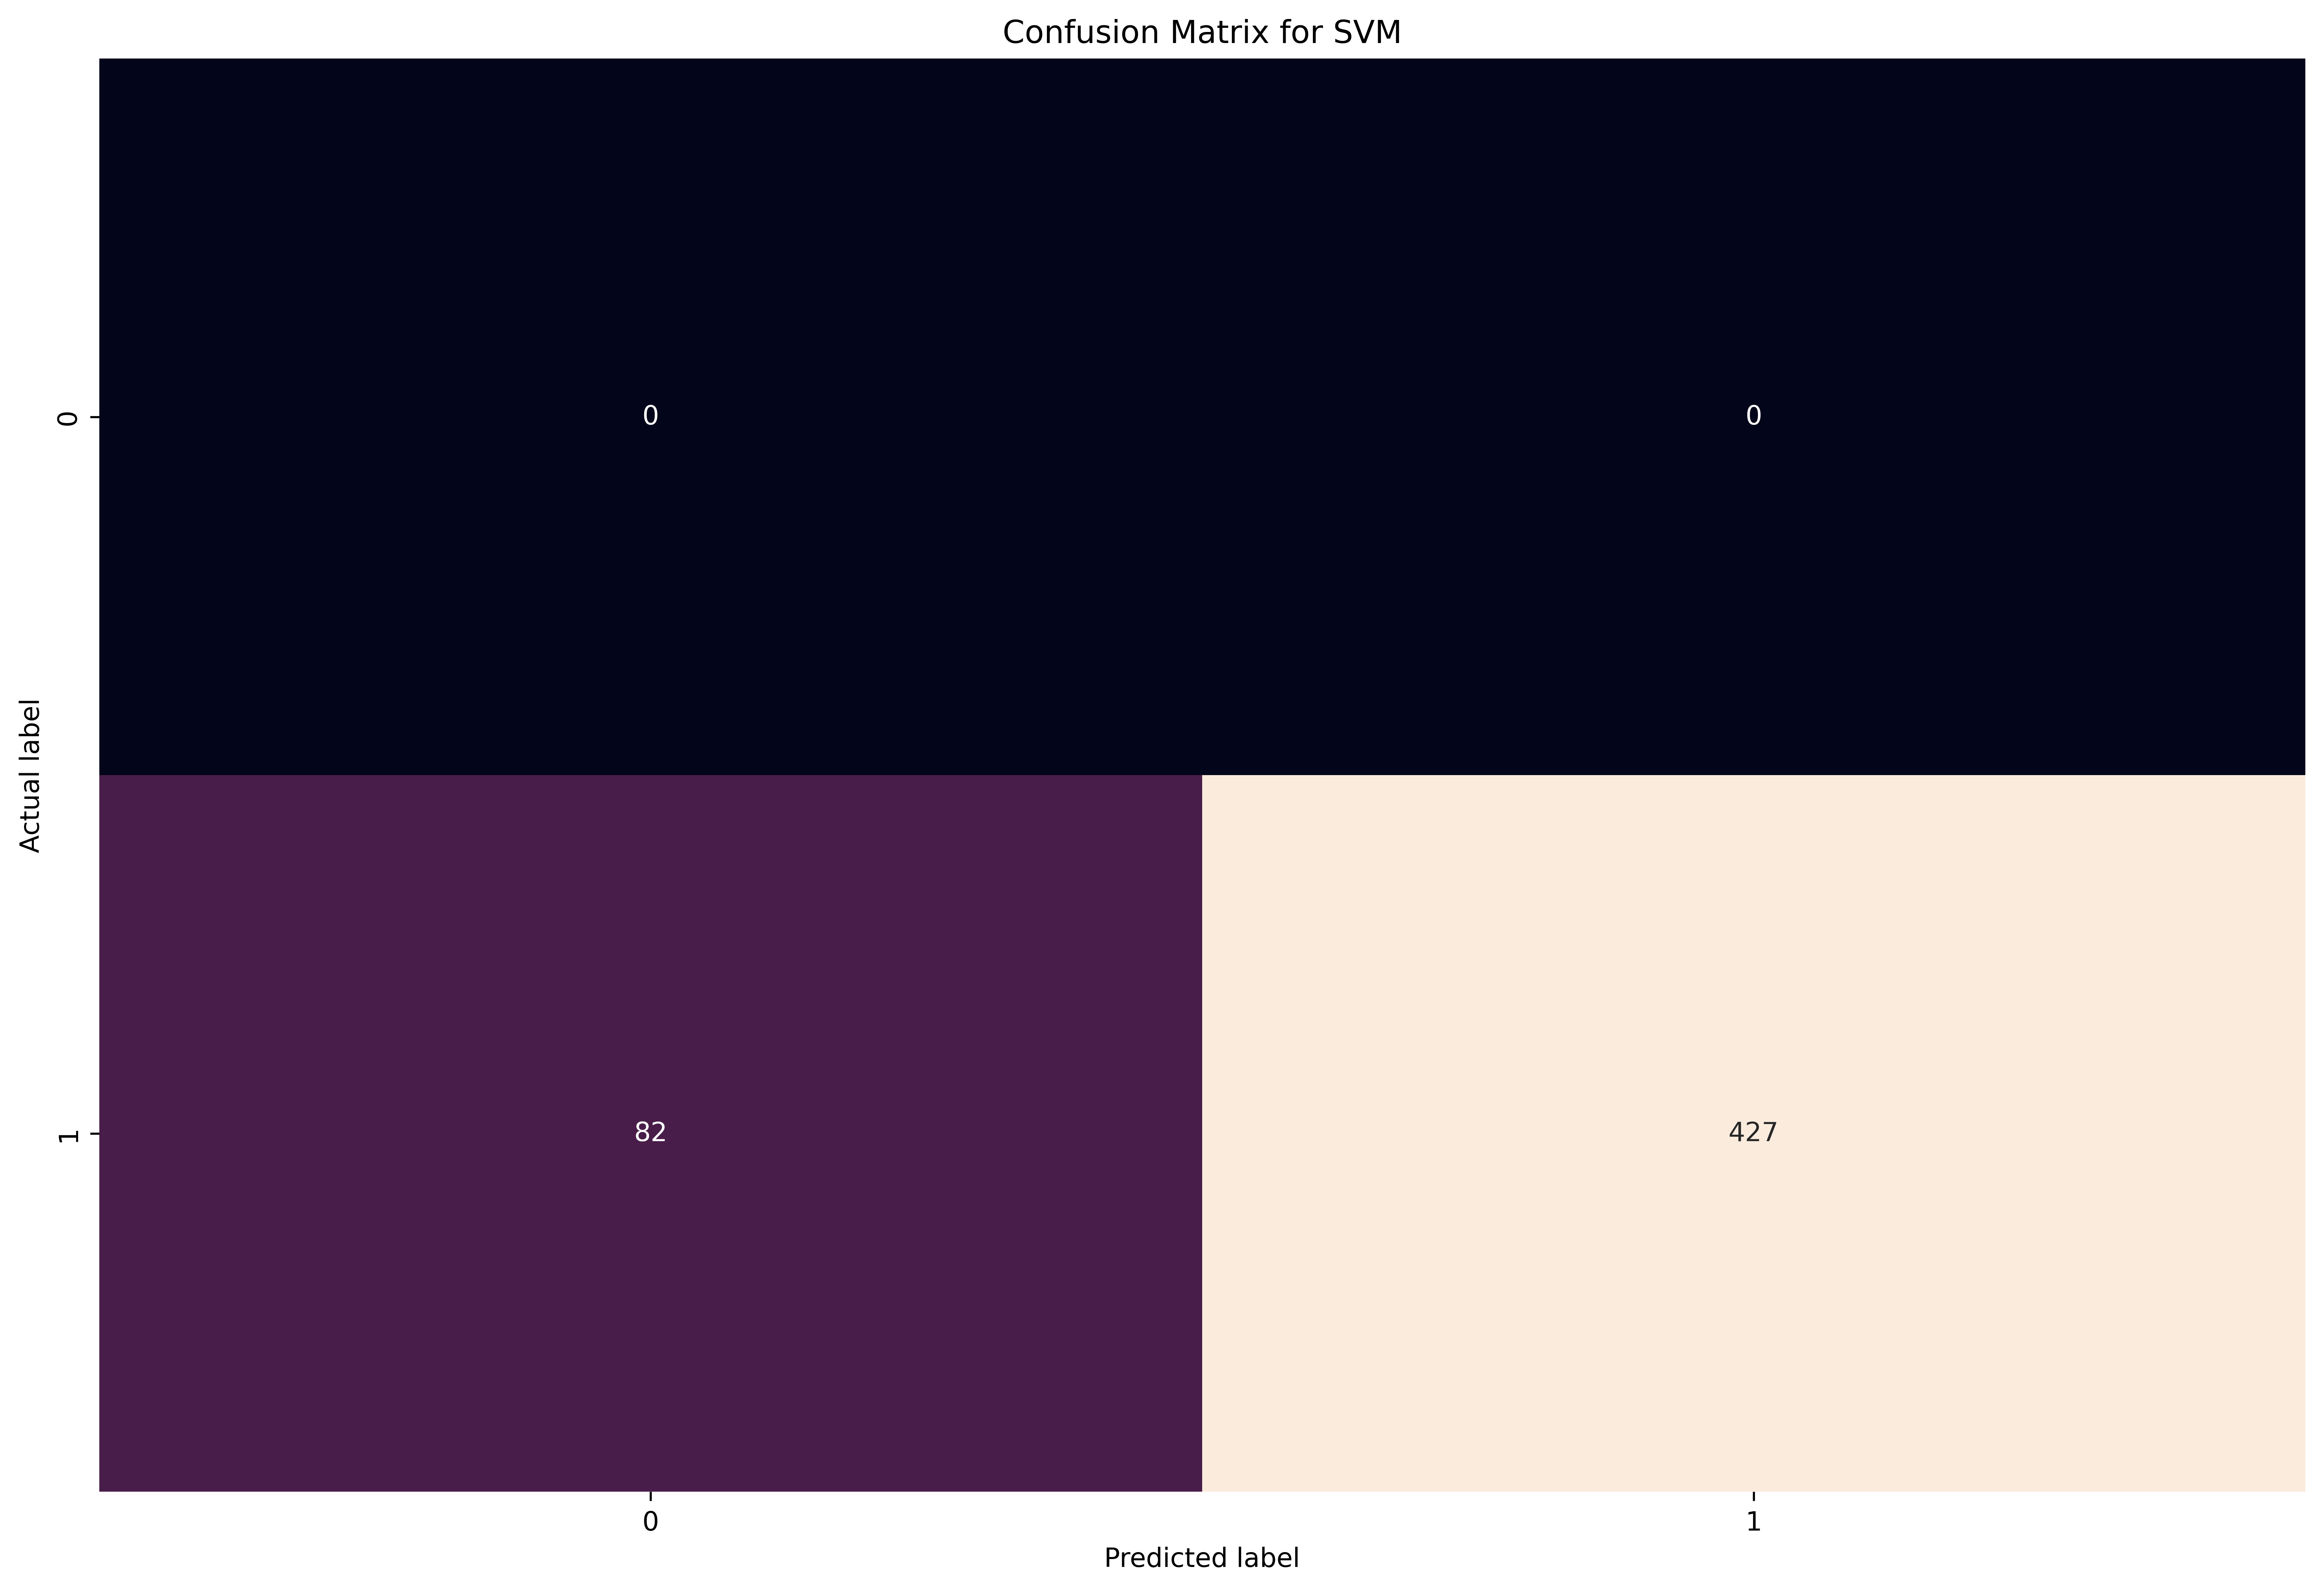

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predict_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

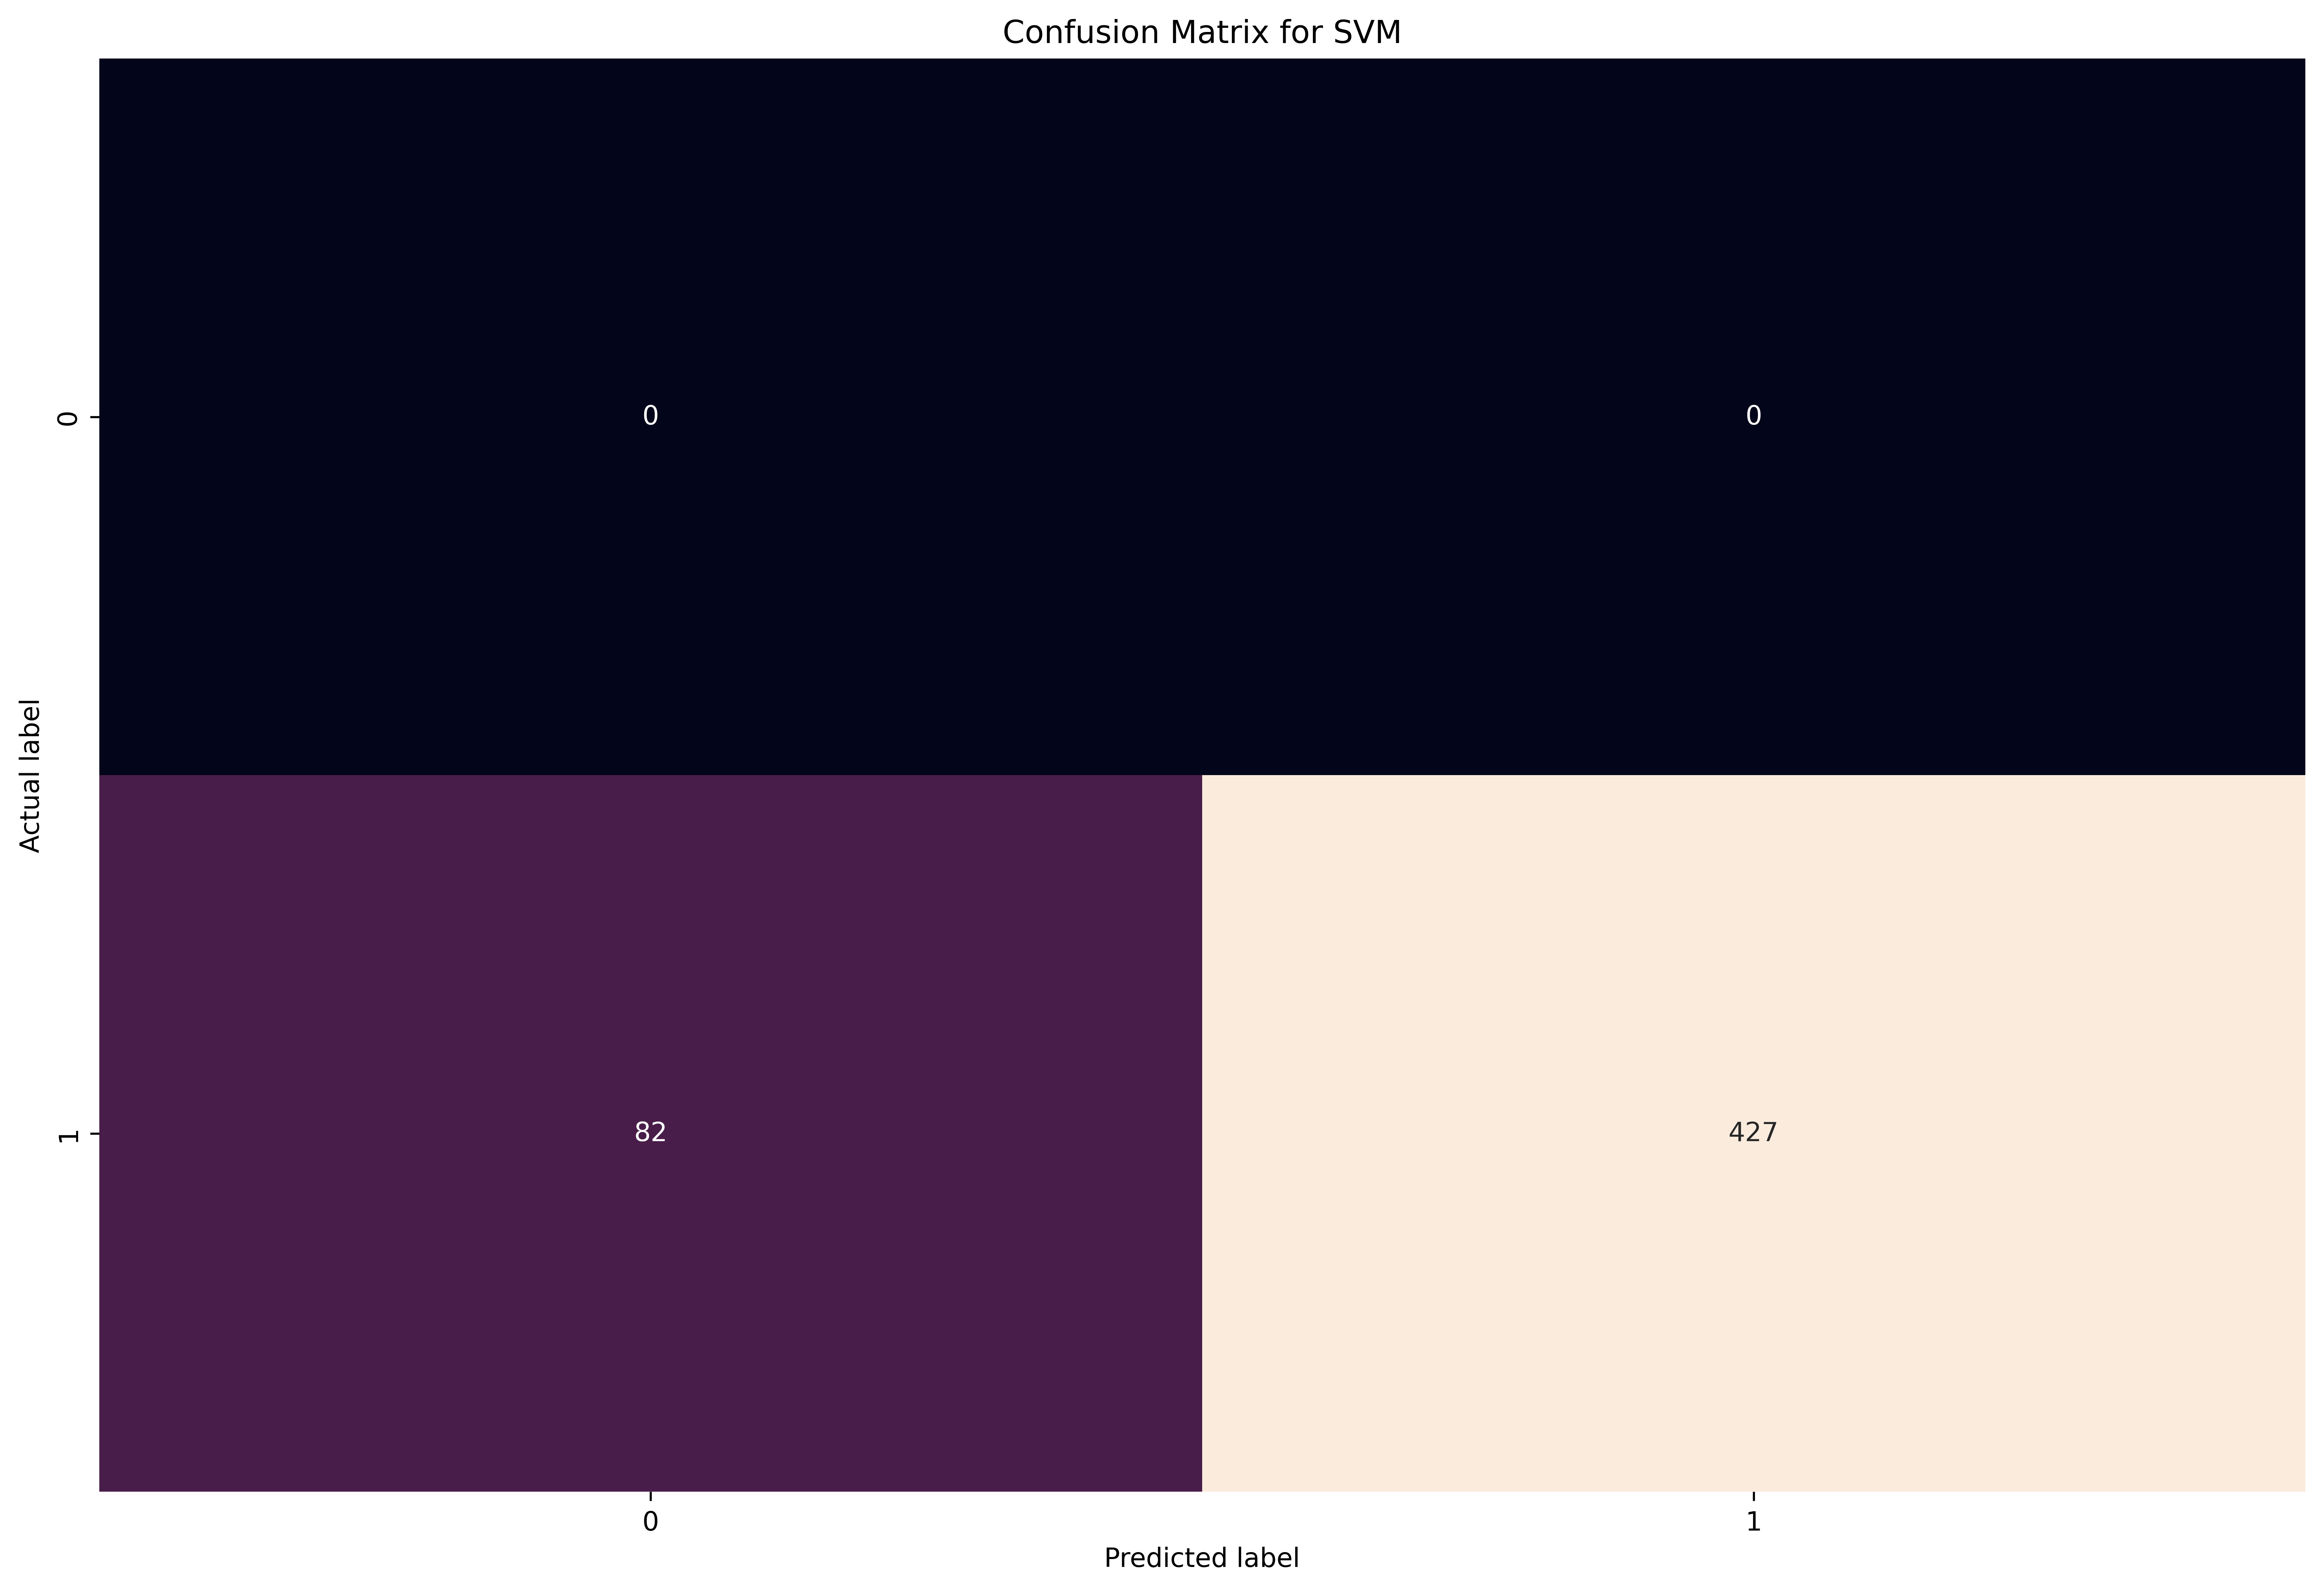

In [47]:
predict_svm = model_svm.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predict_svm)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

## Evaluasi Performa Klasifikasi Naive Bayes
### Precision, Recall dan F Measure

In [48]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("SVM Accuracy:", metrics.accuracy_score(y_test, predict_svm))
print("SVM Precision:", precision_score(y_test,predict_svm, average="micro", pos_label='negative'))
print("SVM Recall:", recall_score(y_test,predict_svm, average="micro", pos_label='positive'))
print("SVM F Measure:", f1_score(y_test,predict_svm, average="micro", pos_label='negative'))
print('\n===============================================================')
print(classification_report(y_test, predict_svm, zero_division=0))

SVM Accuracy: 0.8388998035363457
SVM Precision: 0.8388998035363457
SVM Recall: 0.8388998035363457
SVM F Measure: 0.8388998035363457

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        82
           1       0.84      1.00      0.91       427

    accuracy                           0.84       509
   macro avg       0.42      0.50      0.46       509
weighted avg       0.70      0.84      0.77       509



C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'negative') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\H P\Anaconda3\Anaconda 2022\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'negative') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
